In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = r'E:\Minor Project\PlantVillage(1)\train'
validation_dir= r'E:\Minor Project\PlantVillage(1)\val'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory (
                train_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")
validation_generator = test_datagen.flow_from_directory (
                validation_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")

Found 30591 images belonging to 2 classes.
Found 9759 images belonging to 2 classes.


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers import Dropout

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu',
         input_shape=(256,256,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [7]:
from tensorflow.keras import optimizers

model.compile (loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc',tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [8]:
history  = model.fit(
train_generator,
epochs=30,
validation_data=validation_generator,
)

Epoch 1/30
956/956 [==============================] - 2733s 3s/step - loss: 0.3202 - acc: 0.8564 - true_positives: 7909.0000 - true_negatives: 18288.0000 - false_positives: 2191.0000 - false_negatives: 2203.0000 - precision: 0.7831 - recall: 0.7821 - val_loss: 0.1610 - val_acc: 0.9379 - val_true_positives: 2837.0000 - val_true_negatives: 6316.0000 - val_false_positives: 427.0000 - val_false_negatives: 179.0000 - val_precision: 0.8692 - val_recall: 0.9406
Epoch 2/30
956/956 [==============================] - 1338s 1s/step - loss: 0.1366 - acc: 0.9466 - true_positives: 9318.0000 - true_negatives: 19640.0000 - false_positives: 839.0000 - false_negatives: 794.0000 - precision: 0.9174 - recall: 0.9215 - val_loss: 0.1233 - val_acc: 0.9495 - val_true_positives: 2990.0000 - val_true_negatives: 6276.0000 - val_false_positives: 467.0000 - val_false_negatives: 26.0000 - val_precision: 0.8649 - val_recall: 0.9914
Epoch 3/30
956/956 [==============================] - 1340s 1s/step - loss: 0.0870 - 

Epoch 19/30
956/956 [==============================] - 1558s 2s/step - loss: 0.0235 - acc: 0.9954 - true_positives: 10050.0000 - true_negatives: 20401.0000 - false_positives: 78.0000 - false_negatives: 62.0000 - precision: 0.9923 - recall: 0.9939 - val_loss: 0.0572 - val_acc: 0.9861 - val_true_positives: 2900.0000 - val_true_negatives: 6723.0000 - val_false_positives: 20.0000 - val_false_negatives: 116.0000 - val_precision: 0.9932 - val_recall: 0.9615
Epoch 20/30
956/956 [==============================] - 1314s 1s/step - loss: 0.0208 - acc: 0.9953 - true_positives: 10043.0000 - true_negatives: 20403.0000 - false_positives: 76.0000 - false_negatives: 69.0000 - precision: 0.9925 - recall: 0.9932 - val_loss: 0.0292 - val_acc: 0.9928 - val_true_positives: 2983.0000 - val_true_negatives: 6706.0000 - val_false_positives: 37.0000 - val_false_negatives: 33.0000 - val_precision: 0.9877 - val_recall: 0.9891
Epoch 21/30
956/956 [==============================] - 1325s 1s/step - loss: 0.0202 - acc

In [9]:
model.save("leaf_disease_detection_12.h5")

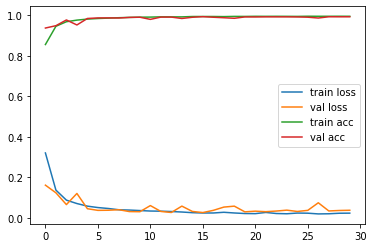

In [10]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()


In [11]:
test_dir = r'E:\Minor Project\PlantVillage(1)\test'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory (
                test_dir,
                target_size=(256,256),
                batch_size=32,
                class_mode="binary")

Found 8448 images belonging to 2 classes.


In [12]:
model.evaluate_generator(test_generator)

C:\Users\asus\anaconda3\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.03614535182714462,
 0.9939630627632141,
 1925.0,
 6472.0,
 20.0,
 31.0,
 0.9897172451019287,
 0.984151303768158]